In [ ]:
!sudo apt-get install python3-pip
!pip3 install --upgrade pip
!pip3 install --upgrade setuptools
!pip3 install matplotlib
!pip3 install networkx

In [2]:
a="   0    50"
print(a.strip().split())


['0', '50']


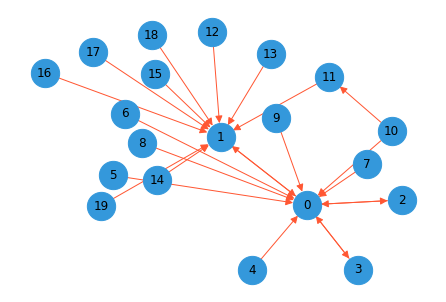

In [8]:
import networkx as nx

edges = []

f = open('../data/twitter_following.txt', 'r')

for line in f.readlines():
    id1, id2 = line.strip().split()
    edges.append((id1,id2))

# for e in edges:
#     print(f'{e[0]}\t{e[1]}')
# create directed graph from edge pairs using NetworkX Library
G = nx.DiGraph(edges)

# visualize the graph
nx.draw(G, with_labels=True, arrows=True, arrowstyle='-|>', arrowsize=15,
        node_color='#3498DB', node_size=800, 
        edge_color='#FF5733')

In [ ]:
# Thống kê số lượng người theo dõi mỗi tài khoản

# # dict để liệt kê top 5 người có nhiều người theo dõi nhất = {}
# list_follower_count = {}
count = 0
current_edge = None
for e in edges:
    # Gặp edge mới, in ra số lượng người theo dõi
    if current_edge and current_edge != e[0]:
        # in ra
        print(f'Tài khoản {current_edge} đang theo dõi {count} người')
        # dictionary để xử lý sắp xếp
        # list_follower_count[e[0]] = count
        # Reset biến đếm, chuyển sang edge mới
        current_edge = e[0]
        count = 0
    else:
        current_edge = e[0]
        count = count + 1
# print('\n Liệt kê 5 người có lượt theo dõi nhiều nhất')
# # In ra 5 người có lượt theo dõi nhiều nhất
# dict_sorted = dict(sorted(list_follower_count.items(),key=lambda x:x[1],reverse=True))
# for item in list(dict_sorted)[0:5]:
#     print(f'Tài khoản {item} đang theo dõi {dict_sorted[item]} người')


In [23]:
#Liệt kê top 5 người có nhiều người theo dõi nhất
current_edge = None
array_temp = []
for e in edges:
    array_temp.append(e[1])



In [26]:
print(array_temp)

['1' '2' '3' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '11' '1' '1' '1' '1'
 '1' '1' '1' '1' '1']


In [24]:
import numpy as np
array_temp = np.array(array_temp)

In [29]:
# Danh sách những người được theo dõi 
listNotDuplicate = list(dict.fromkeys(array_temp))
print(listNotDuplicate)

['1', '2', '3', '0', '11']


In [34]:
sortedArray = {}
for item in listNotDuplicate:
    count = np.count_nonzero(array_temp == item)
    sortedArray[item] = count
    # print(f'Tài khoản  {item} có {count} người theo dõi ')

sortedArray = dict(sorted(sortedArray.items(),key=lambda x:x[1],reverse=True))
for item in sortedArray:
    print(f'Tài khoản {item} được {sortedArray[item]} theo dõi')

{'1': 10, '0': 10, '2': 1, '3': 1, '11': 1}

In [16]:
print(type(e[1]))

<class 'str'>


In [4]:
mutual_followers = []

for u, v in G.edges():
    if G.has_edge(u,v) and G.has_edge(v,u):
        if (v, u) not in mutual_followers:
            mutual_followers.append((u, v))

# List mutual follower pairs:
print('Các cặp tài khoản theo dõi lẫn nhau:')
for u, v in mutual_followers:
    print(u, '<->', v)


Các cặp tài khoản theo dõi lẫn nhau:
0 <-> 1
0 <-> 2
0 <-> 3
